## KNN Classifier (super learning algo)

* Make sure all data are at the same scale.
* low k leads to overfitting. Larger k value leads to underfitting.

### KNN failure cases - 
* With large datasets - n = 5L + 100 columns (lazy learning, work is done during prediction time).
* Bad when dimention is very high. As higher dimension distances become unreliable.
* Outliers don't work well in KNN.
* Non homogenious scaled data. i.e experience and salary columns.
* Imbalanced data.
* When used for inference other than prediction it performs bad. 

* All computation is done during prediction time. i.e the distance between each point is calculated. 
* So for more points the prediction gets slower.


### Distance calculation - 
* Manhattan distance, 
* Minkowski distance, 
* Chebyshev, 
* cosine
* hamming distance - If there are categorical variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

## elbow method to find optimal k value

In [8]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

error_rate = []
# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

np.argmax(sorted(error_rate))

35

## KD Tree, Ball- tree
* Tree algorithms used for spatial division.
* Binary algorithms.
* Ball-tree - Centroid, Pick clusters based on distance from center.
* KD - Tree - The split criteria chosen are often the median.

In [59]:
"""
Ball tree is slower than KD-Trees in low dimensions (d≤3) but a lot faster in high dimensions. 
Both are affected by the curse of dimensionality, 
But Ball-trees tend to still work if data exhibits local structure.
"""

trial = KNeighborsClassifier(n_neighbors=5,
                            weights="uniform", # closer neighbors of a query point will have a greater influence
                            algorithm="auto", # {'auto', 'ball_tree', 'kd_tree', 'brute'} For sparse data, always brute
                            leaf_size=30,
                            p=2, # if 1 manhattan_distance if 2 Euclidean else minkowski_distance
                            metric="minkowski", # Euclidean distance, minkowski, manhattan
                            metric_params=None,
                            n_jobs=None)
                           

Text(0, 0.5, 'Error Rate')

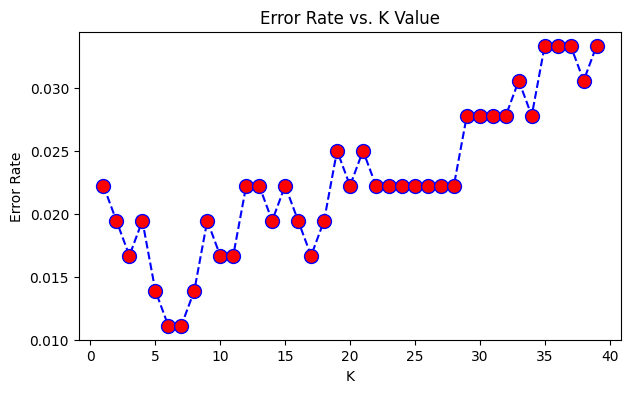

In [14]:
plt.figure(figsize=(7,4))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

The optimal value is 6 or 7. The error_rate increases after that.

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# NOW WITH K=7 (Odd number)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  1  1  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# NOW WITH K=7 (Odd number)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 26  2  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  1  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  3  0  0  0  1  0  0 26  0]
 [ 0  0  0  0  0  1  0  3  0 36]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.90      0.93      0.91        28
           2       0.94      0.97      0.96        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       0.97      0.97      0.97        35
           7       0.92      1.00      0.96        34
           8       0.96      0.87      0.91        30
           9       0.95      0.90      0.92        40

    accuracy                           0.96       360
   macro avg       

### KNN implementation from scratch

In [41]:
from scipy.stats import mode 
from sklearn.neighbors import KNeighborsClassifier 
  
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
        self.K = K 
          
    # Function to store training set 
    def fit( self, X_train, Y_train) : 
        self.X_train = X_train 
        self.Y_train = Y_train 
        # no_of_training_examples, no_of_features 
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
    def predict( self, X_test ): 
        self.X_test = X_test 
        # no_of_test_examples, no_of_features 
        self.m_test, self.n = X_test.shape 
        # initialize Y_predict
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) : 
            x = self.X_test[i] 
            # find the K nearest neighbors from current test example 
            neighbors = np.zeros( self.K ) 
            neighbors = self.find_neighbors( x ) 
            # most frequent class in K neighbors 
            Y_predict[i] = mode( neighbors ).mode   
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
    def find_neighbors( self, x ) : 
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
            d = self.euclidean( x, self.X_train[i] ) 
            euclidean_distances[i] = d 
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted
        inds = euclidean_distances.argsort() 
        
        Y_train_sorted = self.Y_train[inds] 
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
    def euclidean( self, x, x_train ) : 
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 

In [49]:
df = load_digits()
X = df.data 
Y = df.target

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 1/3, random_state = 0 ) 
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1198, 64) (1198,) (599, 64) (599,)


In [45]:
model = K_Nearest_Neighbors_Classifier( K = 10 ) 
model.fit( X_train, Y_train ) 

model1 = KNeighborsClassifier( n_neighbors = 3 ) 
model1.fit( X_train, Y_train ) 
    
# Prediction on test set 

Y_pred = model.predict( X_test ) 
Y_pred1 = model1.predict( X_test ) 

In [46]:
# measure performance 
    
correctly_classified = 0   
correctly_classified1 = 0
    
count = 0
    
for count in range( np.size( Y_pred ) ) :      
    if Y_test[count] == Y_pred[count] :       
        correctly_classified += 1
    if Y_test[count] == Y_pred1[count] : 
        correctly_classified1 += 1 
    count = count + 1

In [47]:
print( "Accuracy on test set by our model       :  ", (  
    correctly_classified / count ) * 100 ) 
print( "Accuracy on test set by sklearn model   :  ", (  
    correctly_classified1 / count ) * 100 ) 

Accuracy on test set by our model       :   97.32888146911519
Accuracy on test set by sklearn model   :   98.33055091819699


In [70]:
knn = KNeighborsClassifier( n_neighbors = 3 ,
                           algorithm="brute", # 'auto', 'ball_tree', 'kd_tree', 'brute'
                           weights="uniform",
                           metric = "cosine") 
knn.fit( X_train, Y_train ) 

prediction = knn.predict( X_test ) 

In [69]:
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

In [65]:
accuracy = np.mean(prediction == Y_test)
accuracy

0.986644407345576

 Manhattan Distance = | x 1 − x 2 | + | y 1 − y 2 |

 D = sqrt (( x 2 − x 1 )^2 + ( y 2 − y 1 )^2)

 minkowski - ( Σ|vector1i – vector2i|p )1/p